In [1]:
#Импортируем все данные
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("netflix_titles.csv")

In [3]:
print(f'The Data-Set Contain {data.shape[0]} Rows and {data.shape[1]} Columns')

The Data-Set Contain 6234 Rows and 12 Columns


In [4]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [5]:
pd_data = data.copy()

In [6]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
pd_data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [8]:
pd_data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# Обработка пропущенных значений
pd_data['director'] = pd_data['director'].fillna('NoDataAvailable')
pd_data['cast'] = pd_data['cast'].fillna('NoDataAvailable')
pd_data['country'] = pd_data['country'].fillna('NoDataAvailable')
pd_data['date_added'] = pd_data['date_added'].fillna(pd_data['date_added'].mode()[0])
pd_data['rating'] = pd_data['rating'].fillna('NoDataAvailable')
print('count of values')
print(pd_data.isnull().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [10]:
pd_data.duplicated().sum()

0

In [11]:
age_limit = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
pd_data["age_limit"]=pd_data["rating"].replace(age_limit)

In [12]:
pd_data["add_year"] = pd.DatetimeIndex(pd_data["date_added"]).year
pd_data["add_year"] = pd_data["add_year"].astype(int)

In [13]:
pd_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_limit,add_year
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Older Kids,2019
1,80117401,Movie,Jandino: Whatever it Takes,NoDataAvailable,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Adults,2016
2,70234439,TV Show,Transformers Prime,NoDataAvailable,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Older Kids,2018
3,80058654,TV Show,Transformers: Robots in Disguise,NoDataAvailable,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Older Kids,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Teens,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NoDataAvailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 1, 2020",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",Adults,2020
6230,70286564,TV Show,Maron,NoDataAvailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 1, 2020",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",Adults,2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NoDataAvailable,NoDataAvailable,NoDataAvailable,"January 1, 2020",2016,NoDataAvailable,60 min,Movies,Nursery rhymes and original music for children...,NoDataAvailable,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NoDataAvailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"January 1, 2020",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",Adults,2020


In [14]:
pd_data.describe()

,show_id,release_year,add_year
count,6.234000e+03,6234.00000,6234.000000
mean,7.670368e+07,2013.35932,2017.986846
std,1.094296e+07,8.81162,1.206759
min,2.477470e+05,1925.00000,2008.000000
25%,8.003580e+07,2013.00000,2017.000000
50%,8.016337e+07,2016.00000,2018.000000
75%,8.024489e+07,2018.00000,2019.000000
max,8.123573e+07,2020.00000,2020.000000


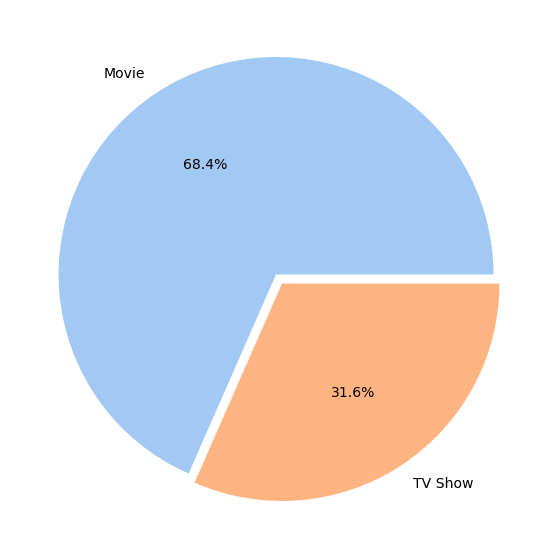

'На основе анализа данных видно, что количество фильмов больше, чем телевизионных шоу. Однако, для более точных выводов о предпочтениях аудитории требуется дополнительный анализ, таких как жанры и рейтинги.'

In [15]:
plt.figure(figsize=(10,10))
size = pd_data['type'].value_counts().reset_index()
labels = size['index']
sizes = size['type']
colors = sns.color_palette('pastel')
plt.pie(sizes, labels = labels, colors = colors, autopct=lambda x: f"{x:.1f}%", explode=(0.025,0.025), 
        textprops={'fontsize': 14})
plt.show()

'''На основе анализа данных видно, что количество фильмов больше, чем телевизионных шоу. Однако, для более точных выводов о предпочтениях аудитории требуется дополнительный анализ, таких как жанры и рейтинги.'''

'Анализируя топ-10 стран с наибольшим количеством фильмов и телевизионных шоу, мы обнаруживаем, что первое место занимает США, страна, которая не только славится своей богатой историей в кинематографе, но и обладает мощной индустрией, способной выпускать великолепные произведения на мировом уровне. Это связано с широкой и разнообразной публикой. Важно заметить, что такие страны, как Индия и Япония, занимают высокие позиции в списке. Это указывает на влияние и популярность азиатских культурных особенностей и индустрий в мировом кинематографе. С другой стороны, наименьшее количество фильмов и телевизионных шоу оказалось в Мексике. Это может быть обусловлено несколькими факторами, включая бюджетные ограничения. Важно учитывать, что кроме количества, качество, популярность и влияние также играют существенную роль в определении успешности стран в этой сфере.'

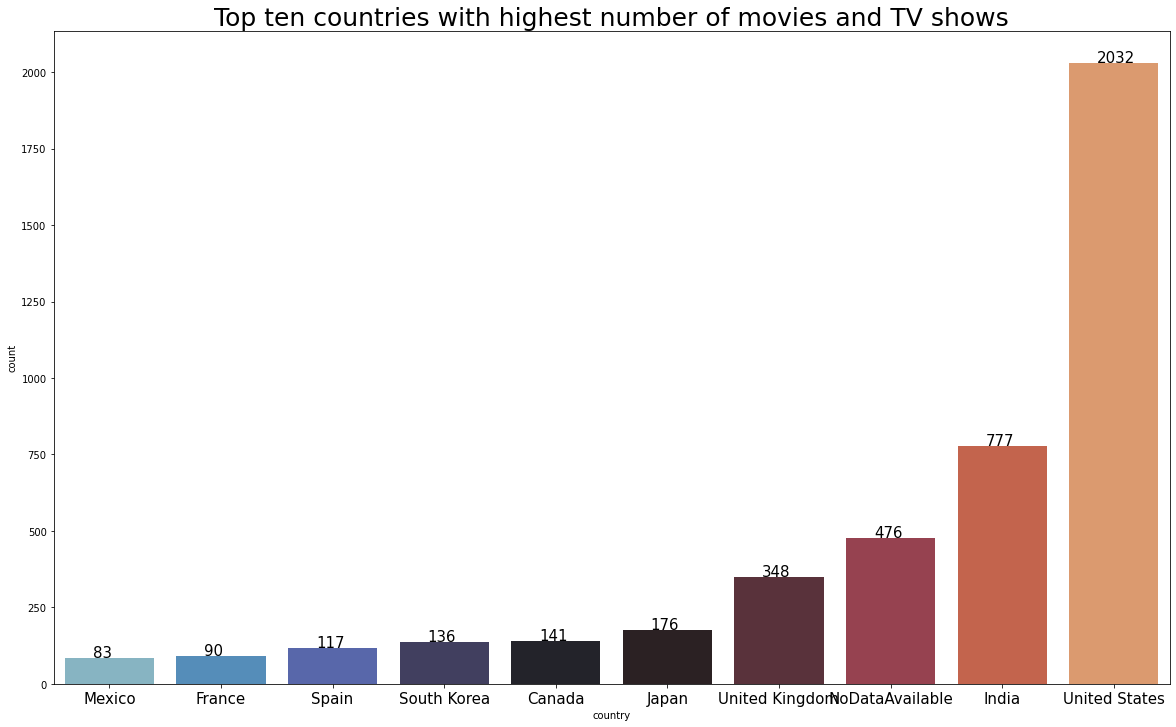

In [16]:
plt.figure(figsize=(20,12))

countries = pd.crosstab(pd_data['country'],['type']).sort_values(by="type",ascending=True)[-10:].reset_index() # сколько раз каждая страна встречается для каждого значения в столбце "type"
ax=sns.barplot(x=countries['country'], y=countries['type'],  palette='icefire', saturation=0.7)
plt.title('Top ten countries with highest number of movies and TV shows', fontsize=25)
plt.ylabel('count')
plt.xticks(fontsize=15)

for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),rotation=0,fontsize=15,color='black')
    
'''Анализируя топ-10 стран с наибольшим количеством фильмов и телевизионных шоу, мы обнаруживаем, что первое место занимает США, страна, которая не только славится своей богатой историей в кинематографе, но и обладает мощной индустрией, способной выпускать великолепные произведения на мировом уровне. Это связано с широкой и разнообразной публикой. Важно заметить, что такие страны, как Индия и Япония, занимают высокие позиции в списке. Это указывает на влияние и популярность азиатских культурных особенностей и индустрий в мировом кинематографе. С другой стороны, наименьшее количество фильмов и телевизионных шоу оказалось в Мексике. Это может быть обусловлено несколькими факторами, включая бюджетные ограничения. Важно учитывать, что кроме количества, качество, популярность и влияние также играют существенную роль в определении успешности стран в этой сфере.'''

'Тройка лидеров в топ-10 стран по количеству выпущенных фильмов - США, Индия и Великобритания. США, безусловно, являются гигантом мировой кинематографии. Эта страна имеет богатую историю киноиндустрии, и Голливуд считается "столицей кино". Индийская киноиндустрия, известная как "Болливуд", имеет уникальный стиль и яркую идентичность. Великобритания имеет долгую историю кинематографии, которая тесно связана с развитием мировой культуры.'

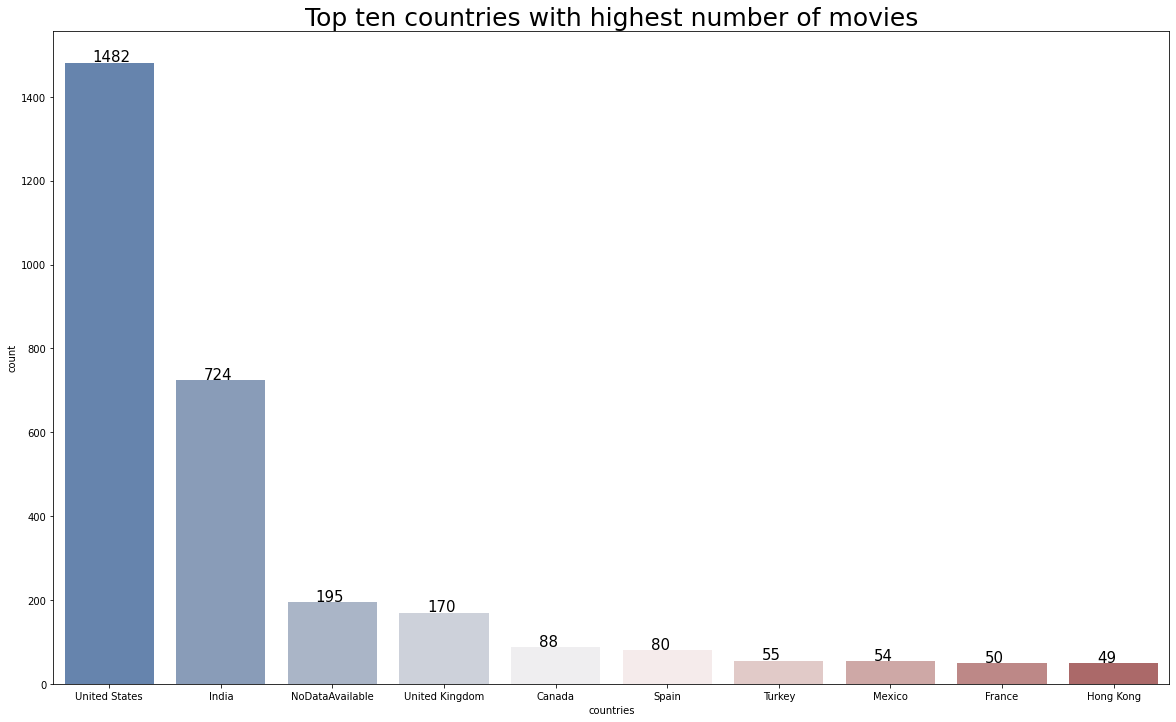

In [23]:
plt.figure(figsize=(20,12))

movie = pd_data[pd_data['type']=='Movie']
movies=movie["country"].value_counts().reset_index().head(10)
ax=sns.barplot(x=movies["index"],y=movies["country"], palette='vlag', saturation=0.7)
plt.title('Top ten countries with highest number of movies', fontsize=25)
plt.xlabel('countries')
plt.ylabel('count')


for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),rotation=0,fontsize=15,color='black')
    
'''Тройка лидеров в топ-10 стран по количеству выпущенных фильмов - США, Индия и Великобритания. США, безусловно, являются гигантом мировой кинематографии. Эта страна имеет богатую историю киноиндустрии, и Голливуд считается "столицей кино". Индийская киноиндустрия, известная как "Болливуд", имеет уникальный стиль и яркую идентичность. Великобритания имеет долгую историю кинематографии, которая тесно связана с развитием мировой культуры.'''

'Распределение топ-10 стран по количеству выпущенных телевизионных шоу. Тут мы видим, что технологически развитые страны Азии, Япония, Южная Корея и Тайвань не уступают лидерам, а также имеют богатую культурную и креативную историю. Их телевизионные шоу, анимация и драмы, находят популярность не только на внутреннем рынке, но и за его пределами, благодаря уникальному стилю и высокому качеству.'

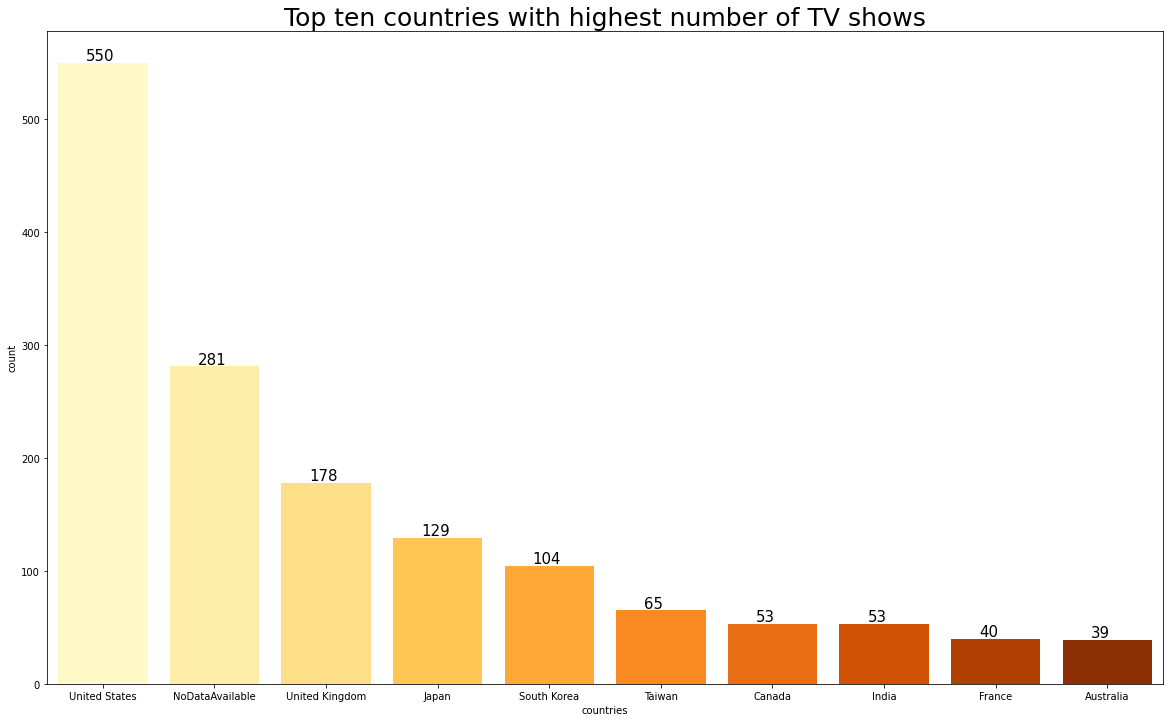

In [30]:
plt.figure(figsize=(20,12))

show = pd_data[pd_data['type']=='TV Show']
shows = show["country"].value_counts().reset_index().head(10)
ax=sns.barplot(x=shows["index"],y=shows["country"], palette='YlOrBr', saturation=1.3)
plt.title('Top ten countries with highest number of TV shows', fontsize=25)
plt.xlabel('countries')
plt.ylabel('count')


for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),rotation=0,fontsize=15,color='black')
    
'''Распределение топ-10 стран по количеству выпущенных телевизионных шоу. Тут мы видим, что технологически развитые страны Азии, Япония, Южная Корея и Тайвань не уступают лидерам, а также имеют богатую культурную и креативную историю. Их телевизионные шоу, анимация и драмы, находят популярность не только на внутреннем рынке, но и за его пределами, благодаря уникальному стилю и высокому качеству.'''

'Падение числа выпущенных фильмов после 2018 года и особенно в 2020 году можно объяснить, что в 2020 году мировая пандемия COVID-19 повлияла на практически все сферы жизни, включая индустрию развлечений. Отмена съемок, закрытие кинотеатров и ограничения на производство фильмов привели к значительному снижению выпуска новых фильмов.'

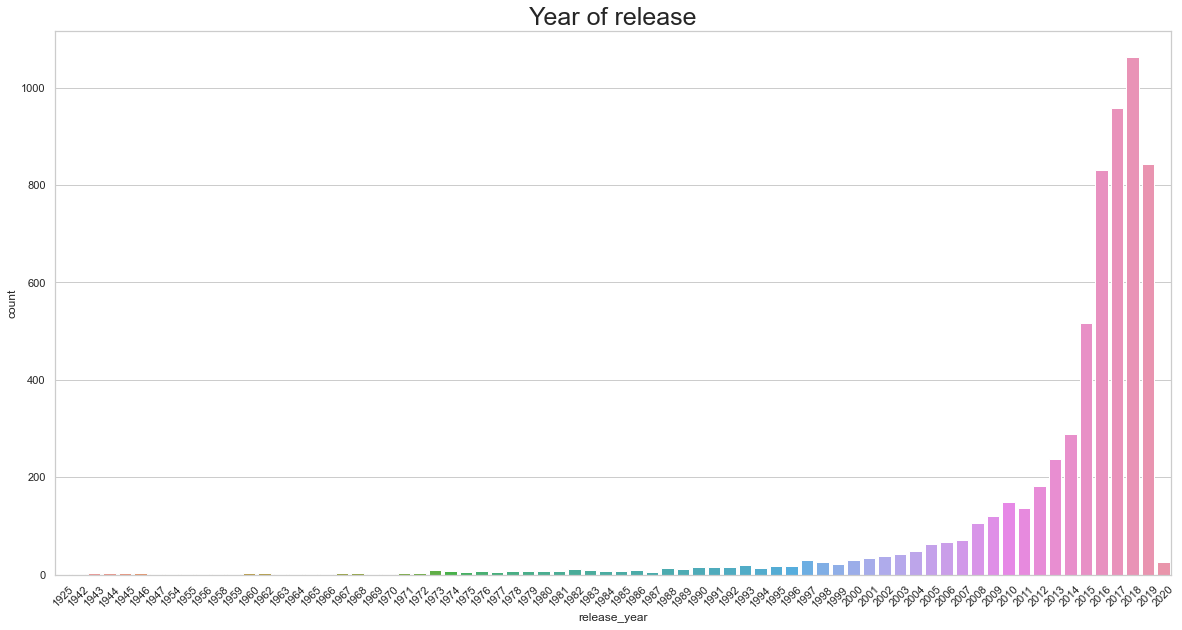

In [37]:
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
sns.countplot(data=pd_data, x='release_year')
plt.xticks(rotation=45);
plt.title('Year of release', fontsize=25);
'''Падение числа выпущенных фильмов после 2018 года и особенно в 2020 году можно объяснить, что в 2020 году мировая пандемия COVID-19 повлияла на практически все сферы жизни, включая индустрию развлечений. Отмена съемок, закрытие кинотеатров и ограничения на производство фильмов привели к значительному снижению выпуска новых фильмов.'''

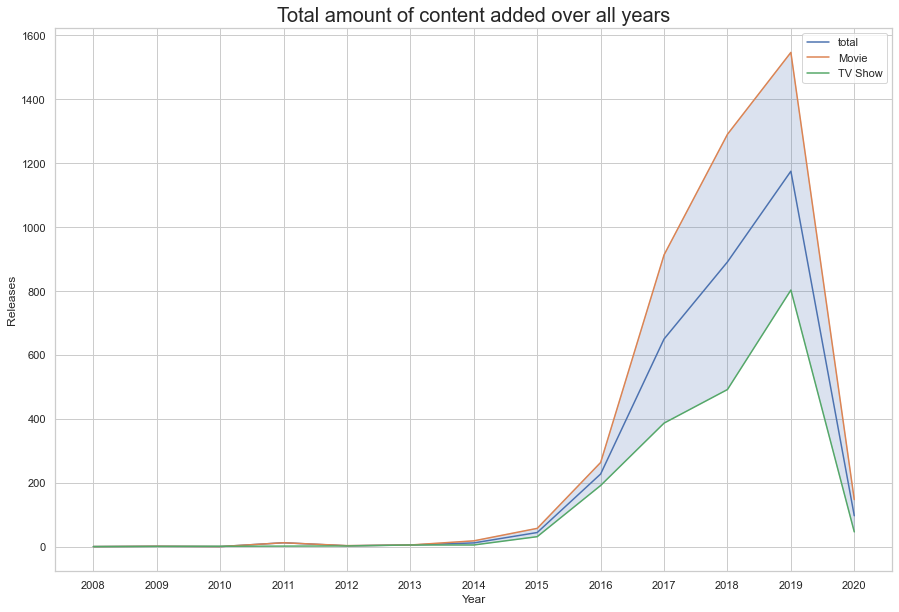

In [40]:
netflix_year = pd_data.groupby('type')['add_year'].value_counts().sort_index().reset_index(name='count')
movies_year = pd_data[pd_data['type'] == 'Movie'].groupby('add_year')['type'].count().reset_index(name='count')
shows_year = pd_data[pd_data['type'] == 'TV Show'].groupby('add_year')['type'].count().reset_index(name='count')

plt.figure(figsize=(15, 10))
sns.lineplot(data=netflix_year, x='add_year', y='count')
sns.lineplot(data=movies_year, x='add_year', y='count')
sns.lineplot(data=shows_year, x='add_year', y='count')
plt.xticks(np.arange(2008, 2021, 1))
plt.title("Total amount of content added over all years", fontsize=20)
plt.legend(['total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()


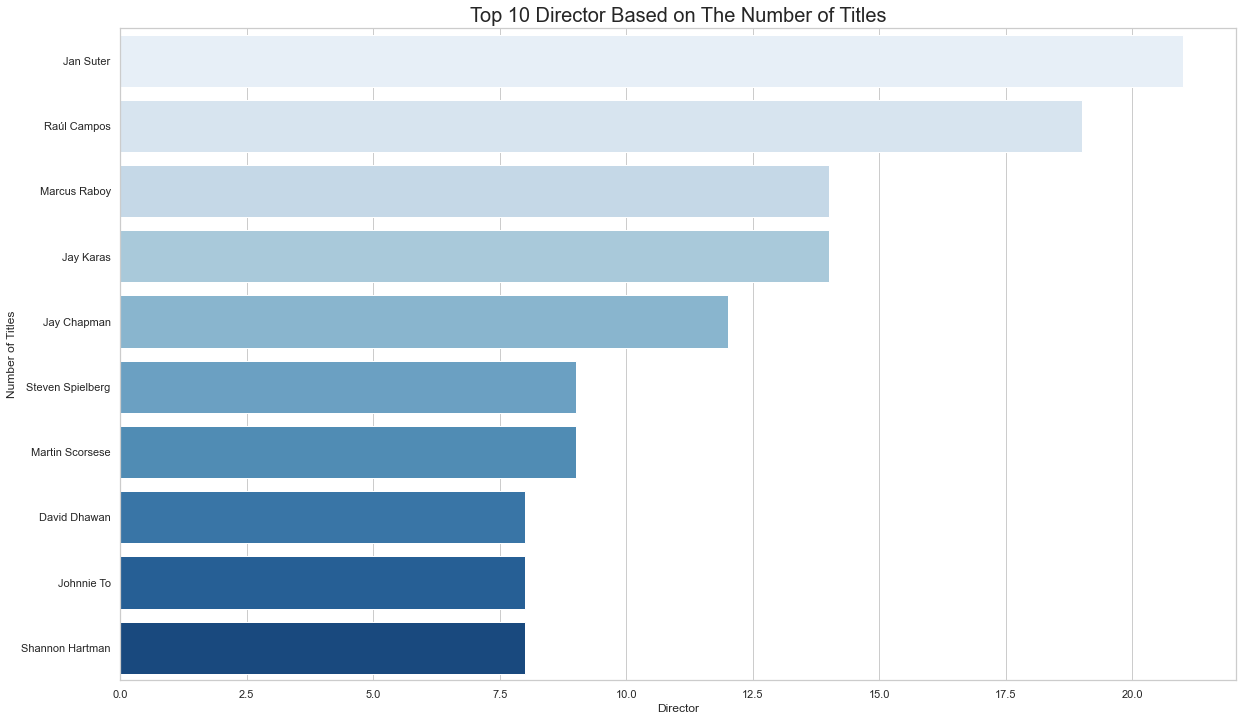

In [44]:
directors = pd_data[pd_data.director != 'NoDataAvailable'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(20, 12))
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Blues')

plt.title('Top 10 Director Based on The Number of Titles', fontsize=20)
plt.xlabel('Director')
plt.ylabel('Number of Titles')

plt.show()


In [45]:
directors

title
Norm of the North: King Sized Adventure            Richard Finn
Norm of the North: King Sized Adventure              Tim Maltby
#realityhigh                                   Fernando Lebrija
Automata                                            Gabe Ibáñez
Fabrizio Copano: Solo pienso en mi                 Rodrigo Toro
                                                   ...         
Miraculous: Tales of Ladybug & Cat Noir           Thomas Astruc
Sacred Games                               Vikramaditya Motwane
Sacred Games                                     Anurag Kashyap
Men on a Mission                                     Jung-ah Im
Leyla and Mecnun                                      Onur Ünlü
Length: 4852, dtype: object

In [59]:
pd_data['cast']

0       Alan Marriott, Andrew Toth, Brian Dobson, Cole...
1                                        Jandino Asporaat
2       Peter Cullen, Sumalee Montano, Frank Welker, J...
3       Will Friedle, Darren Criss, Constance Zimmer, ...
4       Nesta Cooper, Kate Walsh, John Michael Higgins...
                              ...                        
6229    Burnie Burns, Jason Saldaña, Gustavo Sorola, G...
6230    Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...
6231                                      NoDataAvailable
6232    Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...
6233    Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...
Name: cast, Length: 6234, dtype: object

Text(0, 0.5, 'Number of Titles')

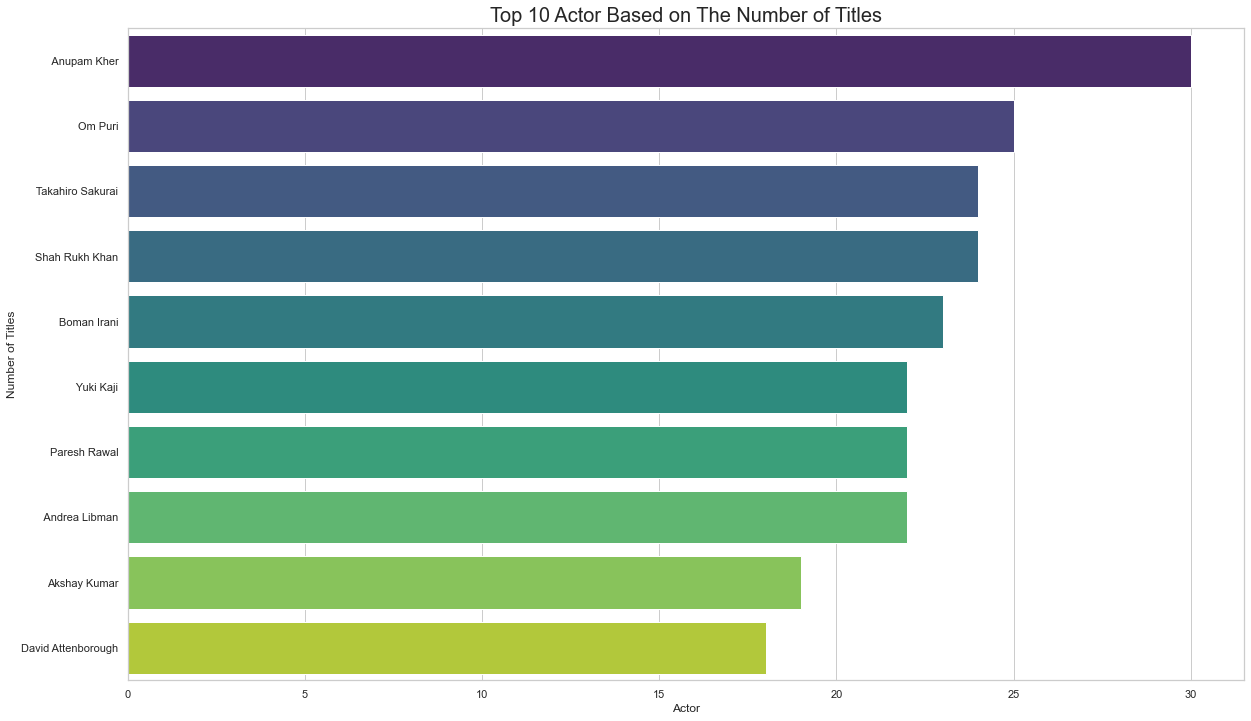

In [64]:
plt.figure(figsize=(20, 12))
top_casts = pd_data[pd_data.cast != 'NoDataAvailable'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=top_casts, order=top_casts.value_counts().index[:10], palette='viridis')
plt.title('Top 10 Actor Based on The Number of Titles', fontsize=20)
plt.xlabel('Actor')
plt.ylabel('Number of Titles')

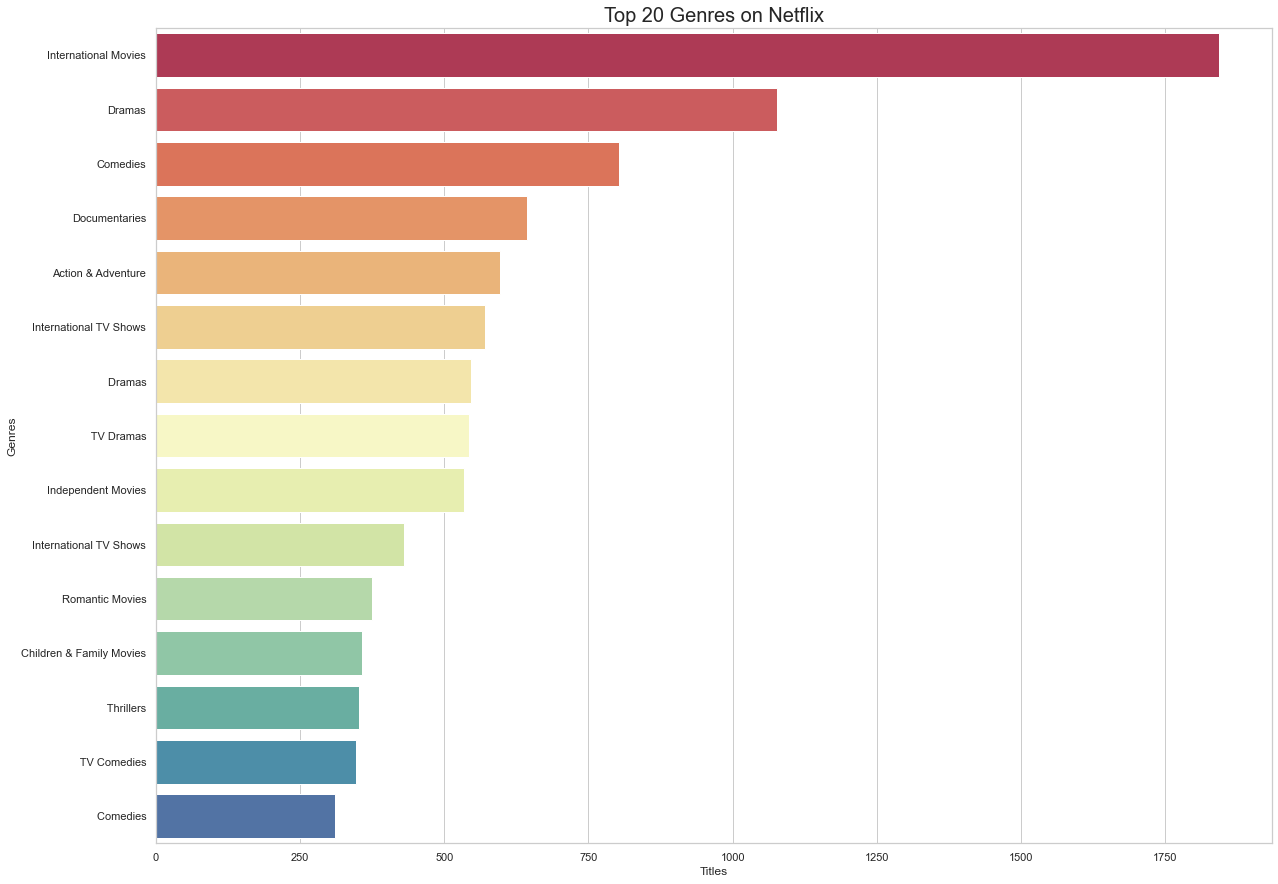

In [56]:
genres = pd_data.set_index('title').listed_in.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 15))
sns.countplot(y = genres, order = genres.value_counts().index[:15], palette='Spectral')
plt.title('Top 20 Genres on Netflix', fontsize=20)
plt.xlabel('Titles')
plt.ylabel('Genres');

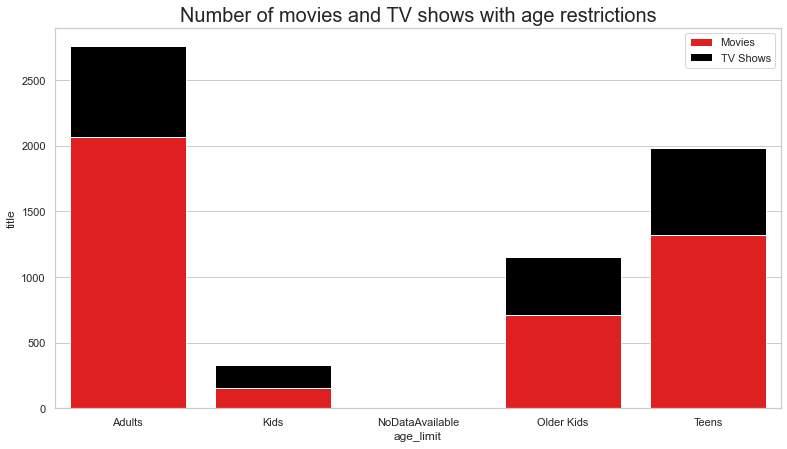

In [58]:
plt.figure(figsize=(13,7))
rating_movies = pd_data[pd_data['type']=='Movie'].groupby('age_limit')['title'].count().reset_index()
rating_shows = pd_data[pd_data['type']=='TV Show'].groupby('age_limit')['title'].count().reset_index()

sns.barplot(x=rating_movies.age_limit, y=rating_movies.title, color='red', label='Movies')
sns.barplot(x=rating_movies.age_limit, y=rating_shows.title, bottom=rating_movies.title, color='black', label='TV Shows')

plt.title('Number of movies and TV shows with age restrictions', fontsize=20)

plt.legend()
plt.show()